# LeNet-5 implementation in Keras for Fashion-MNIST dataset

### In this notebook we implement the LeNet-5 architecture to the Fashion-MNIST dataset. We check the effect of regularization techniques like Dropout, Weights Decay and Batch Normalization on the training and testing accuracy.

# Table of Contents
- Import Dataset
- Dataset Exploration
- Preprocessing
- Plot Function
- LeNet-5 Architecture
- Running the models:
  - LeNet-5 (Normal)
  - LeNet-5 (Dropout)
  - LeNet-5 (Weight Decay)
  - LeNet-5 (Batch Normalization)
- Results  

# Import Dataset



In [1]:
import keras
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("Image Shape: {}".format(X_train[0].shape))

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Image Shape: (28, 28)


# Dataset Exploration

In [2]:
# Let's see how big is the data set
print ('We have ' + str(len(y_train)) + ' datapoints in the Training set')
print ('We have ' + str(len(y_test)) + ' datapoints in the Test set')

We have 60000 datapoints in the Training set
We have 10000 datapoints in the Test set


In [3]:
# Let's see the different categories that we can have
import numpy as np
print ('We have ' + str(len(np.unique(y_train))) + ' different categories to classify')

We have 10 different categories to classify


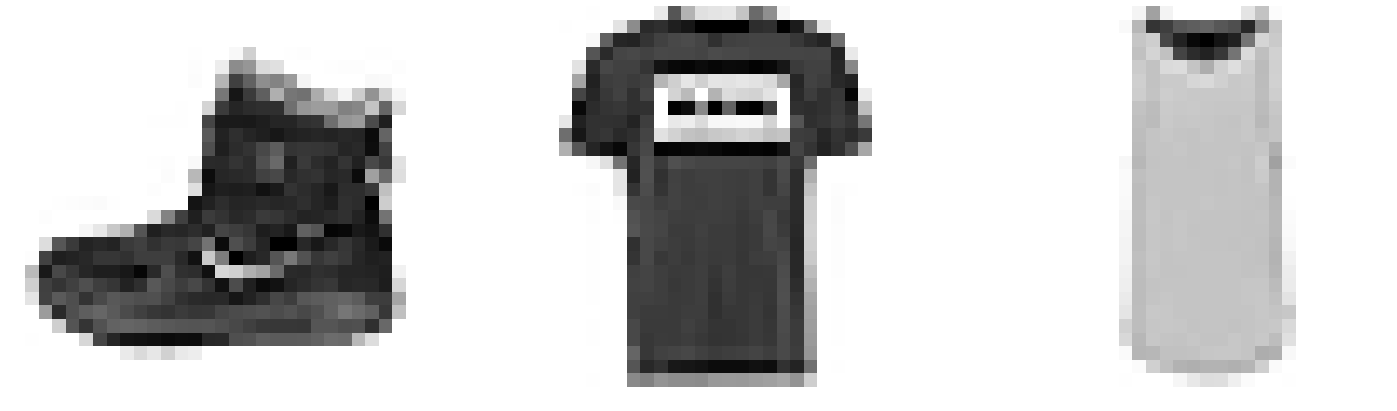

In [4]:
import matplotlib.pyplot as plt
# Let's see some of the pictures
plt.figure(figsize = (25,7))
plt.subplot(1,3,1)
plt.imshow(X_train[0])
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(X_train[1])
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(X_train[2])
plt.axis('off');

# Preprocessing

In [5]:
# Reshape to add channel as 1 for convention
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Pad images to make them 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

# Pixel values between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#Standardization
#mean_px = X_train.mean().astype(np.float32)
#std_px = X_train.std().astype(np.float32)
#X_train = (X_train - mean_px)/(std_px)

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Updated Image Shape: (32, 32, 1)


# Define plot function that will be used to generate the convergence graphs

In [0]:
def plotConvergence(history, title):
  # Get training and test loss histories
  training_loss = history.history['acc']
  test_loss = history.history['val_acc']

  # Create count of the number of epochs
  epoch_count = range(1, len(training_loss) + 1)

  # Visualize loss history
  plt.plot(epoch_count, training_loss, 'r--')
  plt.plot(epoch_count, test_loss, 'b-')
  plt.legend(['Training Accuracy', 'Test Accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(title)
  plt.ylim(0.7,1)

# LeNet-5 Architecture

![Image of LeNet-5](https://github.com/machine-learning/Lenet-5-tensorflow/blob/master/src/imgs/lenet-5.png?raw=true)

Input Image: 32x32.

__Layer 1:__   
Convolution with 6 kernells 3x3 each followed by ReLU.  
Input: 32x32. Output: 28x28x6.  

__Max Pooling Layer 1:__  
Input: 28x28x6. Output: 14x14x6.

__Layer 2:__  
Convolution with 16 kernells 3x3 each followed by ReLU.  
Input 14x14. Output: 10x10x16.

__Max Pooling Layer 2:__   
Input: 28x28x6. Output: 14x14x6.

__Flatten:__   
Input: 5x5x16. Output: 400

__Layer 3:__  
Fully Connected layer followed by ReLU.  
Input: 400. Output: 120.

__Layer 4:__  
Fully Connected layer followed by ReLU.  
Input: 120. Output: 84.

__Layer 5:__  
Fully Connected layer followed by Softmax.  
Input: 84. Output: 10.

# LeNet-5 (Normal)

In [7]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 120, activation = 'relu'))

# Fully Connected Layer 2
model.add(Dense(units = 84, activation = 'relu'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5 = model.fit(x=X_train, 
                          y=y_train, 
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 236us/step - loss: 0.5367 - acc: 0.8068 - val_loss: 0.4136 - val_acc: 0.8505
Epoch 2/30
60000/60000 [==============================] - 9s 157us/step - loss: 0.3490 - acc: 0.8739 - val_loss: 0.3357 - val_acc: 0.8785
Epoch 3/30
60000/60000 [==============================] - 9s 158us/step - loss: 0.3043 - acc: 0.8879 - val_loss: 0.3061 - val_acc: 0.8912
Epoch 4/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.2779 - acc: 0.8972 - val_loss: 0.2970 - val_acc: 0.8891
Epoch 5/30
60000/60000 [==============================] - 9s 155us/step - loss: 0.2567 - acc: 0.9051 - val_loss: 0.2948 - val_acc: 0.8933
Epoch 6/30
60000/60000 [==============================] - 10s 163us/step - loss: 0.2423 - acc: 0.9097 - val_loss: 0.2904 - val_acc: 0.8921
Epoch 7/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.2267 - acc: 0.9150 - val_loss: 0.2741

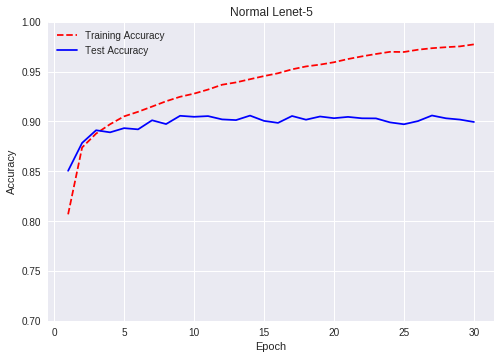

In [8]:
plotConvergence(historyLenet5, 'Normal Lenet-5')

# LeNet-5 (Dropout)

In [9]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Dropout
model.add(Dropout(0.25))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

# Dropout
model.add(Dropout(0.25))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 120, activation = 'relu'))

# Fully Connected Layer 2
model.add(Dense(units = 84, activation = 'relu'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5Dropout = model.fit(x=X_train, 
                                 y=y_train, 
                                 batch_size = batch_size,
                                 epochs = epochs,
                                 validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 177us/step - loss: 0.5673 - acc: 0.7923 - val_loss: 0.4748 - val_acc: 0.8464
Epoch 2/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.3917 - acc: 0.8579 - val_loss: 0.4329 - val_acc: 0.8602
Epoch 3/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.3463 - acc: 0.8726 - val_loss: 0.3976 - val_acc: 0.8697
Epoch 4/30
60000/60000 [==============================] - 11s 180us/step - loss: 0.3218 - acc: 0.8812 - val_loss: 0.3468 - val_acc: 0.8817
Epoch 5/30
60000/60000 [==============================] - 11s 176us/step - loss: 0.3011 - acc: 0.8873 - val_loss: 0.3582 - val_acc: 0.8793
Epoch 6/30
60000/60000 [==============================] - 11s 175us/step - loss: 0.2855 - acc: 0.8941 - val_loss: 0.3106 - val_acc: 0.8885
Epoch 7/30
60000/60000 [==============================] - 10s 169us/step - loss: 0.2732 - acc: 0.8977 - val_loss: 0.

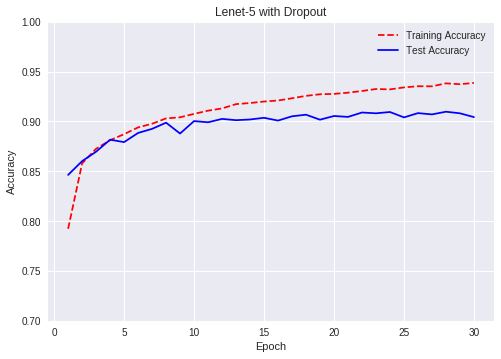

In [10]:
plotConvergence(historyLenet5Dropout, 'Lenet-5 with Dropout')

# LeNet-5 (Weight Decay)

In [11]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1),
                 kernel_regularizer=regularizers.l2(0.01)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6),
                 kernel_regularizer=regularizers.l2(0.01)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 120, activation = 'relu'))

# Fully Connected Layer 2
model.add(Dense(units = 84, activation = 'relu'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5WeightDecay = model.fit(x=X_train, 
                                     y=y_train, 
                                     batch_size = batch_size,
                                     epochs = epochs,
                                     validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 169us/step - loss: 0.6655 - acc: 0.7851 - val_loss: 0.5316 - val_acc: 0.8330
Epoch 2/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.4492 - acc: 0.8568 - val_loss: 0.4889 - val_acc: 0.8333
Epoch 3/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.3980 - acc: 0.8726 - val_loss: 0.4014 - val_acc: 0.8725
Epoch 4/30
60000/60000 [==============================] - 10s 163us/step - loss: 0.3684 - acc: 0.8811 - val_loss: 0.3750 - val_acc: 0.8781
Epoch 5/30
60000/60000 [==============================] - 10s 166us/step - loss: 0.3486 - acc: 0.8872 - val_loss: 0.3770 - val_acc: 0.8782
Epoch 6/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.3383 - acc: 0.8901 - val_loss: 0.3652 - val_acc: 0.8845
Epoch 7/30
60000/60000 [==============================] - 10s 161us/step - loss: 0.3224 - acc: 0.8950 - val_loss: 0.

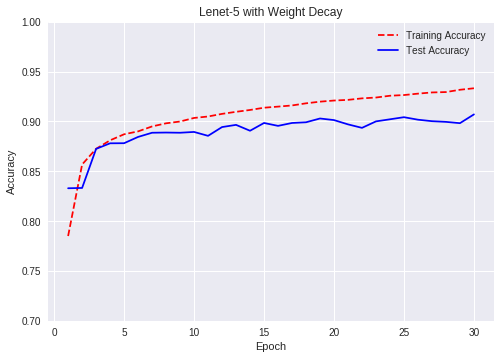

In [12]:
plotConvergence(historyLenet5WeightDecay, 'Lenet-5 with Weight Decay')

# LeNet-5 (Batch Normalization)

In [13]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
from keras.layers.normalization import BatchNormalization


# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Batch Normalization
model.add(BatchNormalization())

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

# Batch Normalization
model.add(BatchNormalization())

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 120, activation = 'relu'))

# Fully Connected Layer 2
model.add(Dense(units = 84, activation = 'relu'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5BatchNorm = model.fit(x=X_train, 
                                   y=y_train, 
                                   batch_size = batch_size,
                                   epochs = epochs,
                                   validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 13s 224us/step - loss: 0.4143 - acc: 0.8490 - val_loss: 0.3557 - val_acc: 0.8690
Epoch 2/30
60000/60000 [==============================] - 13s 213us/step - loss: 0.2841 - acc: 0.8951 - val_loss: 0.3028 - val_acc: 0.8889
Epoch 3/30
60000/60000 [==============================] - 13s 213us/step - loss: 0.2479 - acc: 0.9071 - val_loss: 0.2982 - val_acc: 0.8928
Epoch 4/30
60000/60000 [==============================] - 13s 212us/step - loss: 0.2223 - acc: 0.9163 - val_loss: 0.2854 - val_acc: 0.8962
Epoch 5/30
60000/60000 [==============================] - 13s 219us/step - loss: 0.2025 - acc: 0.9242 - val_loss: 0.2875 - val_acc: 0.8969
Epoch 6/30
60000/60000 [==============================] - 13s 212us/step - loss: 0.1860 - acc: 0.9297 - val_loss: 0.3082 - val_acc: 0.8904
Epoch 7/30
60000/60000 [==============================] - 13s 210us/step - loss: 0.1692 - acc: 0.9353 - val_loss: 0.

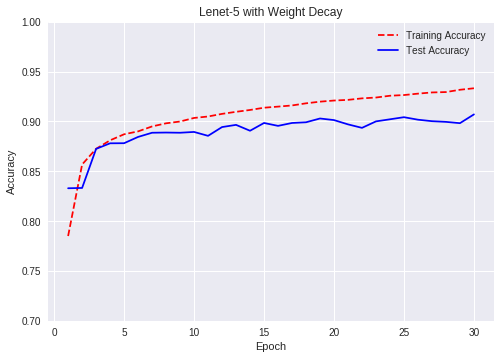

In [14]:
plotConvergence(historyLenet5WeightDecay, 'Lenet-5 with Weight Decay')

# Results

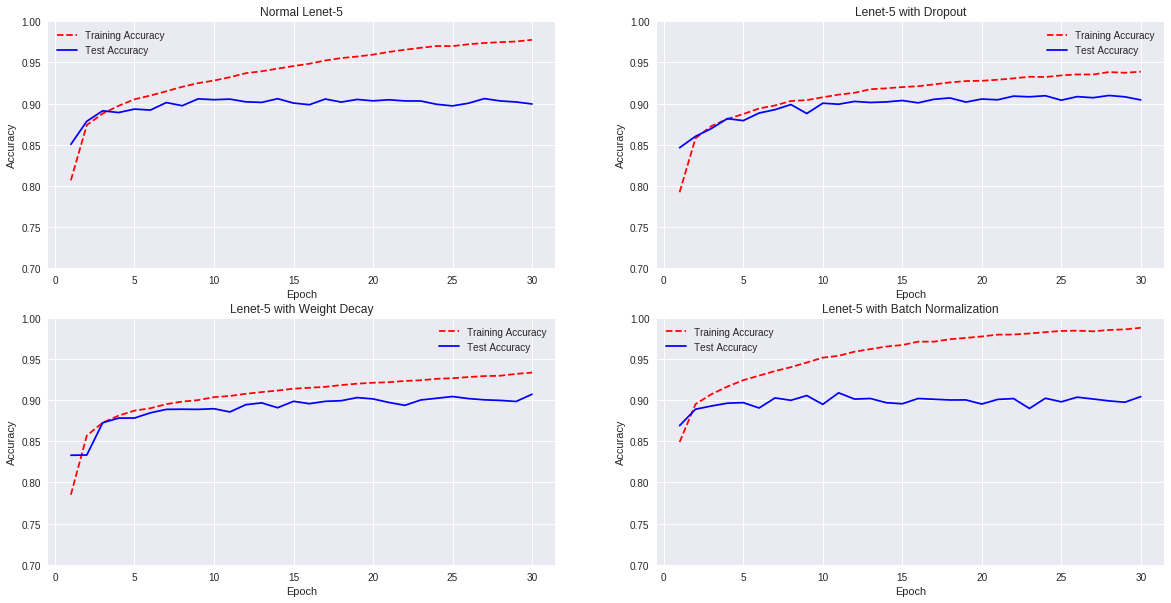

In [15]:
plt.figure(figsize = (20,10))
plt.subplot(221)
plotConvergence(historyLenet5, 'Normal Lenet-5')
plt.subplot(222)
plotConvergence(historyLenet5Dropout, 'Lenet-5 with Dropout')
plt.subplot(223)
plotConvergence(historyLenet5WeightDecay, 'Lenet-5 with Weight Decay')
plt.subplot(224)
plotConvergence(historyLenet5BatchNorm, 'Lenet-5 with Batch Normalization')

__Normal:__  
 - Train: 0.9774  
 - Test: 0.8995  


 __Dropout:__  
 - Train: 0.9387  
 - Test: 0.9044
 

 __Weight Decay:__  
 - Train: 0.9333  
 - Test: 0.9071


  __Batch Normalization:__  
 - Train: 0.9878  
 - Test: 0.9042

First of all we can see that we didn't get any significant difference on the final test accuracy between the different models. All of them are very close to 90% accuracy which is good but not great.  

Next we can see that in the normal case and in the Batch Normalization case we get training accuracy in the range of 98% while in the other cases (Dropout and Weight Decay) we get training accuracy around 93%. Eventhough 97% may seem better, the fact that the test accuracy remains constant among the models suggests us that actually the ones with 93% training accuracy are better because they are not overfitting.  

We can see taht all the models arrive to the final test accuracy pretty fast, after about 3 or 4 epochs. Once the level is reached all models seem to have a test accuracy that oscilates with similar noise. We do not observe decay in the test accuracy while we keep training.  

Things we can play with in order to improve:  
- The position of the regularization layers on the network
- The batch size
- The number of epochs
- The Learning rate